In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [2]:
# read the data
file_zip = ZipFile('.\compustat.zip')
compustat_data = pd.read_csv(file_zip.open('compustat.csv'))

In [3]:
compustat_data.head(10)

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0
5,1000,19670630,1967,2,INDL,C,D,STD,000032102,USD,1967Q2,1967Q2,0.277,NaN,I,NaN,3089.0
6,1000,19670930,1967,3,INDL,C,D,STD,000032102,USD,1967Q3,1967Q3,0.277,NaN,I,NaN,3089.0
7,1000,19671231,1967,4,INDL,C,D,STD,000032102,USD,1967Q4,1967Q4,0.277,5.363,I,NaN,3089.0
8,1000,19680331,1968,1,INDL,C,D,STD,000032102,USD,1968Q1,1968Q1,0.645,NaN,I,NaN,3089.0
9,1000,19680630,1968,2,INDL,C,D,STD,000032102,USD,1968Q2,1968Q2,0.645,NaN,I,NaN,3089.0


### Extract the number that we are interested in

In [4]:
# extract the data we are interested in
compustat_data_extract = compustat_data[['sic', 'datacqtr', 'cusip', 'cshoq', 'saleq', 'prccq']]
# calculate market cap
compustat_data_extract['market_cap'] = compustat_data_extract['cshoq'] * compustat_data_extract['prccq']
compustat_data_extract.head(20)

d:\miniconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sic,datacqtr,cusip,cshoq,saleq,prccq,market_cap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN
5,3089.0,1967Q2,000032102,0.277,NaN,NaN,NaN
6,3089.0,1967Q3,000032102,0.277,NaN,NaN,NaN
7,3089.0,1967Q4,000032102,0.277,5.363,NaN,NaN
8,3089.0,1968Q1,000032102,0.645,NaN,NaN,NaN
9,3089.0,1968Q2,000032102,0.645,NaN,NaN,NaN


### For saleq and market cap, compute the stat values

In [5]:
def statistic_calc(data):
    '''
    calculate:
    Time series mean
    Time Series standard deviation
    Time Series count of missing values
    Time Series ratio of missing values
    Aggregate the result in a dataframe
    '''
    # calculating mean value
    data_mean = data.mean()
    # calculating std value
    data_std = data.std()
    # counting the missing number
    missing_count = data.isna().sum()
    # calculating the total length of the data
    total_count = len(data)
    
    return pd.Series([data_mean, data_std, missing_count, missing_count / total_count], index=['mean value', 'standard deviation', 'missing number', 'ratio of missing number'])

In [6]:
# calculating the stat for the given variables
compustat_data_extract_stat = compustat_data_extract[['market_cap', 'saleq']].apply(statistic_calc)
compustat_data_extract_stat

,market_cap,saleq
mean value,2057.473104,445.150664
standard deviation,13202.197457,2679.706576
missing number,468276.000000,269498.000000
ratio of missing number,0.258530,0.148787


### Use Boxplot to detect outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1fabf908860>,
 'caps': [<matplotlib.lines.Line2D at 0x1fabf908ef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fabf908438>],
 'medians': [<matplotlib.lines.Line2D at 0x1fabf91e5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fabf91e908>],
 'means': []}

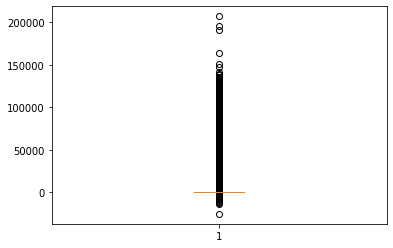

In [7]:
plt.boxplot(compustat_data_extract.dropna(subset=['saleq'])['saleq'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fabfb92438>,
 'caps': [<matplotlib.lines.Line2D at 0x1fabfb92b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fabfb92048>],
 'medians': [<matplotlib.lines.Line2D at 0x1fabfb92f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fabfb9e550>],
 'means': []}

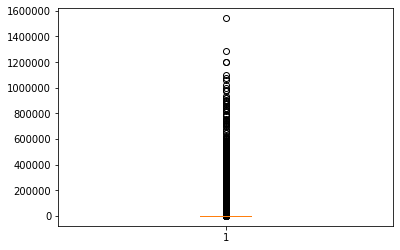

In [8]:
plt.boxplot(compustat_data_extract.dropna(subset=['market_cap'])['market_cap'])

### Compute Industry Concentration

In [9]:
compustat_data_extract

,sic,datacqtr,cusip,cshoq,saleq,prccq,market_cap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1811294,NaN,2019Q1,G4511M108,NaN,4.560,NaN,NaN
1811295,NaN,2019Q2,G4511M108,20.162,12.713,2.7500,55.445500
1811296,NaN,2019Q3,G4511M108,22.518,11.750,1.1500,25.895700
1811297,NaN,2019Q4,G4511M108,25.662,12.790,1.0173,26.105953


In [10]:
# drop the data containing nan
compustat_data_clean = compustat_data_extract.dropna()[['sic', 'datacqtr', 'market_cap']]
# generate industry code from the sic code for each company
compustat_data_clean['industry_code'] = compustat_data_clean['sic'].apply(lambda x: str(x)[:2])
# calculate the sum and ratio(in percent) of the market cap
compustat_data_clean['cap_sum'] = compustat_data_clean.groupby(['datacqtr', 'industry_code'])['market_cap'].transform('sum')
compustat_data_clean = compustat_data_clean[['industry_code', 'datacqtr', 'market_cap', 'cap_sum']]
compustat_data_clean['cap_percent'] = compustat_data_clean['market_cap'] / compustat_data_clean['cap_sum'] * 100
# calculating HHI and average HHI
compustat_data_clean['cap_percent^2'] = compustat_data_clean['cap_percent'] * compustat_data_clean['cap_percent']
compustat_data_clean['HHI'] = compustat_data_clean.groupby(['industry_code', 'datacqtr'])['cap_percent^2'].transform('sum')
compustat_data_clean['HHI_avg'] = compustat_data_clean.groupby(['industry_code'])['HHI'].transform('mean')
compustat_data_clean

,industry_code,datacqtr,market_cap,cap_sum,cap_percent,cap_percent^2,HHI,HHI_avg
18,30,1970Q3,26.202500,5.948329e+03,0.440502,1.940419e-01,1849.571608,1686.412117
19,30,1970Q4,24.460000,8.067256e+03,0.303201,9.193083e-02,1424.771672,1686.412117
20,30,1971Q1,34.193250,8.344458e+03,0.409772,1.679131e-01,1386.952707,1686.412117
21,30,1971Q2,29.023500,9.039094e+03,0.321089,1.030979e-01,1296.213826,1686.412117
22,30,1971Q3,16.256875,8.831406e+03,0.184080,3.388554e-02,1386.786799,1686.412117
...,...,...,...,...,...,...,...,...
1811284,28,2020Q1,65.485200,3.928648e+06,0.001667,2.778433e-06,306.695458,361.136259
1811286,28,2019Q2,39.935590,4.902719e+06,0.000815,6.635081e-07,264.085520,361.136259
1811287,28,2019Q3,36.755800,4.180287e+06,0.000879,7.731070e-07,289.973856,361.136259
1811288,28,2019Q4,32.249750,5.274911e+06,0.000611,3.737856e-07,265.681295,361.136259


In [11]:
# sort the data and get the top 4 industries
compustat_data_clean = compustat_data_clean.sort_values(by = 'HHI_avg', ascending = False)
compustat_data_clean.drop_duplicates(['industry_code'])

,industry_code,datacqtr,market_cap,cap_sum,cap_percent,cap_percent^2,HHI,HHI_avg
708861,89,1988Q3,3.500625,3.500625e+00,100.000000,10000.000000,10000.000000,10000.000000
1456007,86,2002Q3,4.232820,4.232820e+00,100.000000,10000.000000,10000.000000,10000.000000
1380992,81,2005Q4,6132.746800,6.633285e+03,92.454141,8547.768147,8604.708138,9134.847753
221335,90,2000Q2,34.788000,4.248863e+01,81.876032,6703.684538,7032.162772,8811.546856
225015,84,1984Q1,9.659250,1.101675e+01,87.677854,7687.406113,7839.241391,8736.967212
...,...,...,...,...,...,...,...,...
1704754,13,2008Q3,80.012000,1.136127e+06,0.007043,0.000050,308.992416,385.605237
286935,28,1996Q2,107.960625,8.456407e+05,0.012767,0.000163,381.441566,361.136259
350122,60,1980Q2,275.958375,3.768967e+04,0.732186,0.536096,282.676690,287.556770
413373,67,2007Q4,33.193510,4.737316e+05,0.007007,0.000049,131.380922,207.061412


Text(0.5, 0, 'Time')

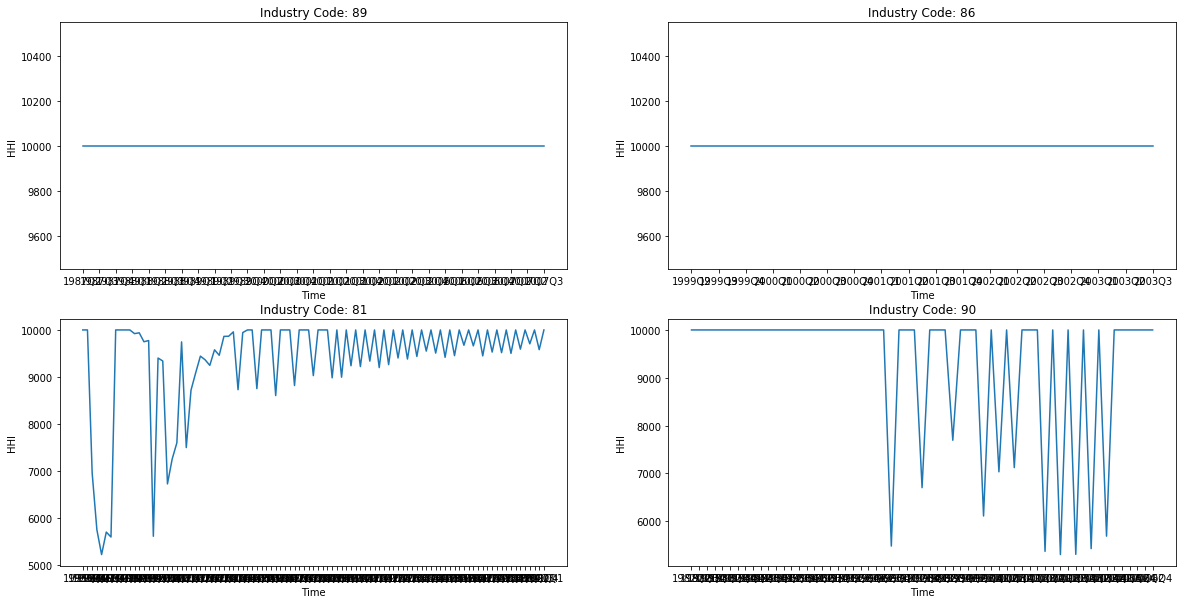

In [12]:
fig = plt.figure(figsize=(20, 10)) 
axes = fig.subplots(2, 2)

# extract the data for the top 4 industries
# industry: service, nec
compustat_data_clean_89 = compustat_data_clean[compustat_data_clean['industry_code'] == '89']
compustat_data_clean_89 = compustat_data_clean_89.sort_values(by = 'datacqtr')
axes[0, 0].plot(compustat_data_clean_89['datacqtr'], compustat_data_clean_89['HHI'])
axes[0, 0].set_title(label='Industry Code: {}'.format('89'))
axes[0, 0].set_ylabel('HHI')
axes[0, 0].set_xlabel('Time')

# industry: non-profit membership organization
compustat_data_clean_86 = compustat_data_clean[compustat_data_clean['industry_code'] == '86']
compustat_data_clean_86 = compustat_data_clean_86.sort_values(by = 'datacqtr')
axes[0, 1].plot(compustat_data_clean_86['datacqtr'], compustat_data_clean_86['HHI'])
axes[0, 1].set_title(label='Industry Code: {}'.format('86'))
axes[0, 1].set_ylabel('HHI')
axes[0, 1].set_xlabel('Time')

# industry: legal service
compustat_data_clean_81 = compustat_data_clean[compustat_data_clean['industry_code'] == '81']
compustat_data_clean_81 = compustat_data_clean_81.sort_values(by = 'datacqtr')
axes[1, 0].plot(compustat_data_clean_81['datacqtr'], compustat_data_clean_81['HHI'])
axes[1, 0].set_title(label='Industry Code: {}'.format('81'))
axes[1, 0].set_ylabel('HHI')
axes[1, 0].set_xlabel('Time')

# industry: nan
compustat_data_clean_90 = compustat_data_clean[compustat_data_clean['industry_code'] == '90']
compustat_data_clean_90 = compustat_data_clean_90.sort_values(by = 'datacqtr')
axes[1, 1].plot(compustat_data_clean_90['datacqtr'], compustat_data_clean_90['HHI'])
axes[1, 1].set_title(label='Industry Code: {}'.format('90'))
axes[1, 1].set_ylabel('HHI')
axes[1, 1].set_xlabel('Time')